DEBUG:matplotlib:matplotlib data path: /Users/paul/dev/pm_ws25/.venv/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/paul/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/paul/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/paul/.matplotlib/fontlist-v390.json
DEBUG:root:Composing:
 StructuredNet: places: [ p0, p1, p2, p3, p4, p5, p6 ]
transitions: [ (t0, 'b4840d4273444a258c7509417ff5cb70'), (t1, 'e5aee5557fe44bf3bb360a9dbb64ceb4'), (t2, 'f2756398de2f469d8aa566f4d9653195'), (t3, '50ad9a12502742e4b5990e3a4d7e02ab'), (t4, '545604569e6841508e79b457127416ec'), (t5, 'ee6cff0e103d48149387fe8fc462e2af') ]
arcs: [ (t0, 'b4840d4273444a258c7509417ff5cb70')->p1, (t1, 'e5aee5557fe44bf3bb360a9dbb64ceb4')->p2, (t2, 'f2756398de2f469d8aa566f4d9653195')->p3, (t3, '50ad9a12502742e4b5990e3a4d7e02ab')->p4, (t4, '545604569e6841508e79b457127416ec')->p5, (t5, 'ee6cff0e103d4

StructuredNet: places: [ p0, p0, p0, p1, p1, p1, p2, p2, p2, p3, p3, p4, p4, p5, p5, p6, p_and_in, p_and_out, p_loop_in, p_loop_out ]
transitions: [ (t0, '25501a2485d349ffb1e44bb4ecf22e36'), (t0, 'b4840d4273444a258c7509417ff5cb70'), (t0, 'ca400475ab7b4946831eaa53a675c7b2'), (t1, '32a322c262c048108371b2d35aba3741'), (t1, 'c9bc4da58e35470cbf669fdc6dd43e48'), (t1, 'e5aee5557fe44bf3bb360a9dbb64ceb4'), (t2, 'd883ddc5a6af4429ac7c9617823d5590'), (t2, 'f2756398de2f469d8aa566f4d9653195'), (t3, '50ad9a12502742e4b5990e3a4d7e02ab'), (t3, 'bc120560b9294170b2e1ee36377f2a8b'), (t4, '545604569e6841508e79b457127416ec'), (t4, 'b660a0ea78fa409e8f88fd9bd494c08c'), (t5, 'ee6cff0e103d48149387fe8fc462e2af'), (t_join, None), (t_link_Seqnet_and_Seqnet_Seqnet, None), (t_loop_join, None), (t_loop_split, None), (t_split, None) ]
arcs: [ (t0, '25501a2485d349ffb1e44bb4ecf22e36')->p1, (t0, 'b4840d4273444a258c7509417ff5cb70')->p1, (t0, 'ca400475ab7b4946831eaa53a675c7b2')->p1, (t1, '32a322c262c048108371b2d35aba3741')-

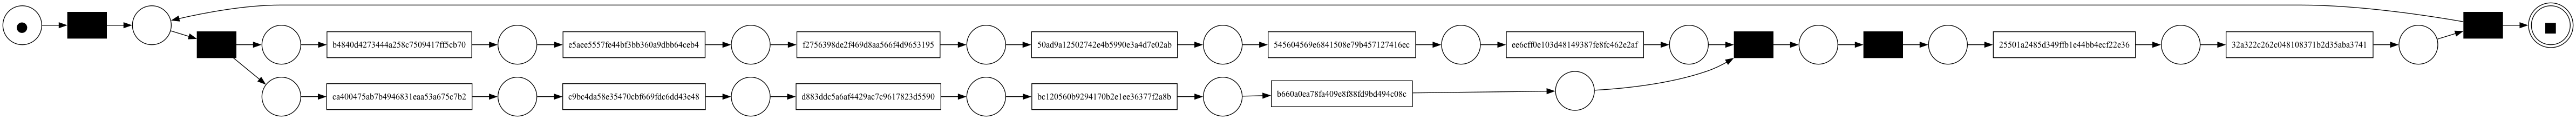

In [1]:
%load_ext autoreload
%autoreload 2
import sys
# ensure graphviz executables are visible to notebook (this sucks)
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

sys.path.append("../..")

from experiments.simulation.models import sample_net
from pm4py.vis import view_petri_net
import matplotlib.pyplot as plt
from time import perf_counter
import torch

dist_params = {
    "op": lambda: torch.distributions.Categorical(
        torch.tensor([0.3, 0.3, 0.3, 0.1])
    ).sample(),
    "seq_len": lambda: torch.distributions.Poisson(4).sample().int(),
    "p_stop": lambda d: torch.distributions.Bernoulli(
        0.2 + 0.1 * d
    ).sample(),  # deeper → likelier to stop
}
stnet = sample_net(dist_params)
print(stnet)
N = stnet.to_tensor()
print(N)

view_petri_net(stnet.net, stnet.im, stnet.fm)

torch.Size([20])
torch.Size([18, 20])
torch.Size([18, 20])


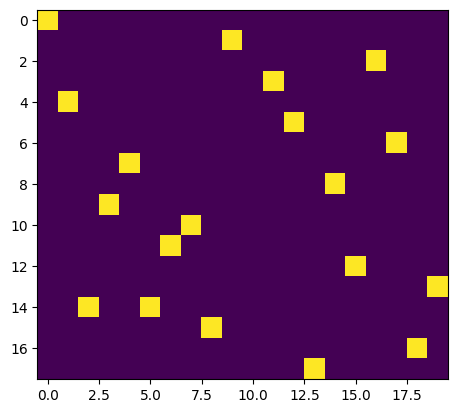

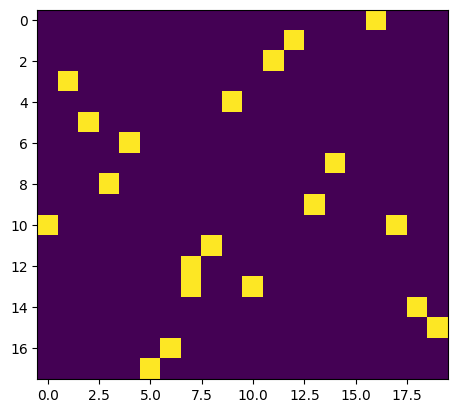

tensor([12])
tensor([10])
tensor([0, 6])
tensor([0, 7])
tensor([2, 7])
tensor([3, 7])
tensor([4, 7])
tensor([1, 7])
tensor([5, 7])
tensor([7])
tensor([8])
tensor([9])
tensor([17])
tensor([14])
tensor([16])
tensor([11])
tensor([15])
tensor([13])
tensor([10])
tensor([0, 6])
tensor([0, 7])
tensor([2, 7])
tensor([2, 8])
tensor([3, 8])
tensor([4, 8])
tensor([1, 8])
tensor([1, 9])
tensor([5, 9])
tensor([9])
tensor([17])
tensor([14])
tensor([16])
tensor([11])
tensor([15])
tensor([13])
tensor([10])
tensor([0, 6])
tensor([0, 7])
tensor([2, 7])
tensor([2, 8])
tensor([2, 9])
tensor([3, 9])
tensor([ 3, 17])
tensor([3])
tensor([4])
tensor([1])
tensor([5])
tensor([14])
tensor([16])
tensor([11])
tensor([15])
tensor([13])
tensor([10])
tensor([0, 6])
tensor([0, 7])
tensor([2, 7])
tensor([2, 8])
tensor([3, 8])
tensor([3, 9])
tensor([4, 9])
tensor([ 4, 17])
tensor([4])
tensor([1])
tensor([5])
tensor([14])
tensor([16])
tensor([11])
tensor([15])
tensor([13])
tensor([10])
tensor([0, 6])
tensor([2, 6])
tenso

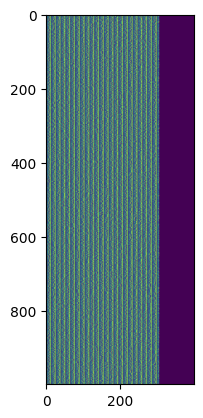

In [2]:
from experiments.simulation.simulate import simulate_batch, simulate, apply_labels

TRACE_LENGTH = 400
TRACE_COUNT = 1000

import logging
logging.getLogger("matplotlib").setLevel(logging.WARN)

# %%
print(N["M0"].shape)

# %%
print(N["pre"].shape)
print(N["post"].shape)

# %%

plt.imshow(N["pre"].float())
plt.show()
plt.imshow(N["post"].float())
plt.show()
# %%
simulate((N['pre'], N['post']), N['M0'], N['Mf'], N['labels'])
# %%
device = "cuda" if torch.cuda.is_available() else "cpu"

start = perf_counter()
batch = simulate_batch(
        (N['pre'].to(device), N['post'].to(device)),
        N['M0'].to(device),
        N['Mf'].to(device),
        N['labels'],
        steps=TRACE_LENGTH,
        batch_size=TRACE_COUNT,
    )
stop = perf_counter()
print(
    batch   
)
# does ~ 1s on a net of [120, 120] instead of 1.5m+ with pm4py (CPU time)
# GPU is still a little slow because of the loop over steps (GPU time 0.35s).
# But 285x faster on GPU.
t_torch = stop - start
print("Elapsed time:", t_torch)

# %%

plt.imshow(
    simulate_batch(
        (N['pre'].to(device), N['post'].to(device)),
        N['M0'].to(device),
        N['Mf'].to(device),
        N['labels'],
        steps=TRACE_LENGTH,
        batch_size=TRACE_COUNT,
    ).cpu()
    + 1
)

In [3]:
from pm4py.pm4py.objects.log.obj import EventLog, Trace

def apply_labels(log: torch.Tensor, labels: list[str]) -> EventLog:
    def apply_label(tok: torch.Tensor) -> str:
        tok = tok.item()
        if tok >= 0:
            return labels[tok]
        else:
            return "τ"

    return EventLog([Trace(list(map(apply_label, trace))) for trace in log])

apply_labels(batch, N["labels"])


[{'attributes': {}, 'events': ['b4840d4273444a258c7509417ff5cb70', '..', 'τ']}, '....', {'attributes': {}, 'events': ['ca400475ab7b4946831eaa53a675c7b2', '..', 'τ']}]

In [4]:
from pm4py.pm4py.algo.simulation.playout.petri_net.algorithm import Variants, apply

var = Variants.BASIC_PLAYOUT
start = perf_counter()
baseline = apply(stnet.net, stnet.im, stnet.fm, parameters={
    "max_trace_length": TRACE_LENGTH,
    "no_traces": TRACE_COUNT,
})
end = perf_counter()
t_pm4py = end - start
print(f"elapsed time: {t_pm4py}")


elapsed time: 26.340645042000688


In [5]:
t_pm4py / t_torch

103.87879294249635

In [6]:
dir(baseline[0])
[e for e in baseline[0]]

[{'concept:name': 'ca400475ab7b4946831eaa53a675c7b2', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 40, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'c9bc4da58e35470cbf669fdc6dd43e48', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 41, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'd883ddc5a6af4429ac7c9617823d5590', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 42, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'bc120560b9294170b2e1ee36377f2a8b', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 43, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'b660a0ea78fa409e8f88fd9bd494c08c', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 44, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'b4840d4273444a258c7509417ff5cb70', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 45, tzinfo=datetime.timezone.utc)},
 {'concept:name': 'e5aee5557fe44bf3bb360a9dbb64ceb4', 'time:timestamp': datetime.datetime(1970, 4, 26, 18, 46, 46, tzi

In [7]:
type(baseline)

pm4py.objects.log.obj.EventLog